# 8x8 BWR assembly at Clab

This example is basically the same as the previous one, the only difference is that an 8x8 BWR assembly is being measured at the Clab storage facility in Sweden. There will be one detector with absorbers in front of it.

We compare a case when the source locations are the center of the pins and an other case when 10 source locations are selected randomly in each pin.

In [1]:
from feign.geometry import *
from feign.blocks import *

## Materials

The fuel pins are made of uranium-dioxide, in zirconium cladding. The pool around the assembly is filled with water. Outside the pool air is considered (in reality there is ofc concrete walls, but the direct gamma ray won't pass through that, so no need to model those).

In front of the detector, three absorber sheets are placed made of lead, aluminium and copper.

In [2]:
uo2=Material('1')
uo2.set_density(10.5)
uo2.set_path(('/data/UO2.dat',1))

he=Material('2')
he.set_density(0.00561781)
he.set_path(('/data/He.dat',1))

zr=Material('3')
zr.set_density(6.52)
zr.set_path(('/data/Zr.dat',1))

h2o=Material('4')
h2o.set_density(1.0)
h2o.set_path(('/data/H2O.dat',1))

ss=Material('5')
ss.set_density(8.02)
ss.set_path(('/data/SS.dat',1))

air=Material('6')
air.set_density(0.001225)
air.set_path(('/data/Air.dat',1))

lead=Material('7')
lead.set_density(11.34)
lead.set_path(('/data/Pb.dat',1))

copper=Material('8')
copper.set_density(8.96)
copper.set_path(('/data/Cu.dat',1))

alu=Material('9')
alu.set_density(2.7)
alu.set_path(('/data/Al.dat',1))

## Pins

There are two types of pins in the assembly:

- fuel pins
- empty water channel

In [3]:
fuel=Pin('1')
fuel.add_region(uo2,0.52)
fuel.add_region(he,0.53)
fuel.add_region(zr,0.615)

waterchannel=Pin('3')
waterchannel.add_region(h2o,0.53)
waterchannel.add_region(zr,0.615)

## Assembly

While defining the assembly we set the pitch in cm, the coolant, create a pool around the assembly, and define the PWR fuelmap.

The corner of the assembly is facing the pool, and the distance from the center of the assembly to the pool wall is 55 cm.


In [4]:
bwrOrig=Assembly(8,8)
bwrOrig.set_pitch(1.62)
bwrOrig.set_source(uo2)
bwrOrig.set_coolant(h2o)
bwrOrig.set_surrounding(air)
bwrOrig.set_pins(fuel,waterchannel)

fuelmap= [['1', '1', '1', '1', '1', '1', '1', '1'], 
          ['1', '1', '1', '1', '1', '1', '1', '1'], 
          ['1', '1', '1', '1', '1', '1', '1', '1'], 
          ['1', '1', '1', '1', '1', '1', '1', '1'], 
          ['1', '1', '1', '1', '3', '1', '1', '1'], 
          ['1', '1', '1', '1', '1', '1', '1', '1'], 
          ['1', '1', '1', '1', '1', '1', '1', '1'], 
          ['1', '1', '1', '1', '1', '1', '1', '1']]

bwrOrig.set_fuelmap(fuelmap)
pool=Rectangle(Point(55, 55),Point(55, -55),Point(-55, -55),Point(-55, 55)).rotate(45)
bwrOrig.set_pool(pool)

## Detector

The detector point is facing the corner, and the distance of the detector from the center of the assembly is 247.1 cm.

There is a collimator between the assembly and the detector. The back is 125cm from the center and has a 23.2 cm wide slit, and the front is 243cm from the center and has an 8.2 cm wide slit.

An other detector point is facing the opposite corner.

In [5]:
det=Detector('D')
det.set_location(Point(174.726, 174.726))

coll=Collimator('collD')
coll.set_back(Segment(Point(125.0,-11.6),Point(125.0,11.6)).rotate(45))
coll.set_front(Segment(Point(243.0,-4.1),Point(243.0,4.1)).rotate(45))
det.set_collimator(coll)


## Absorber

We can define an absorber with a Rectangle or a Circle object. We have to set the material of the absorber and the material which is accommodating the absorber. There are 4 absorber sheets in front of the detector: 1mm of copper, 21mm of stainless steel, 3mm of aluminium and 8mm of lead

There is a thin steel of 5mm on the pool side as well, to keep out the water from the collimator hole.

In [6]:
steelwindow=Absorber('steelwindow')
steelwindow.set_form(Rectangle(Point(55.0,-30),Point(55.0,30),Point(55.5,30),Point(55.5,-30)).rotate(45))
steelwindow.set_material(ss)
steelwindow.set_accommat(air)

copper1mm=Absorber('copper1mm')
copper1mm.set_form(Rectangle(Point(243.7, -40.0),Point(243.7, 40.0),Point(243.8,40),Point(243.8,-40)).rotate(45))
copper1mm.set_material(copper)
copper1mm.set_accommat(air)

steel21mm=Absorber('steel21mm')
steel21mm.set_form(Rectangle(Point(243.8,-40),Point(243.8,40),Point(245.9,40),Point(245.9,-40)).rotate(45))
steel21mm.set_material(ss)
steel21mm.set_accommat(air)

alu3mm=Absorber('alu3mm')
alu3mm.set_form(Rectangle(Point(245.9,-40),Point(245.9,40),Point(246.2,40),Point(246.2,-40)).rotate(45))
alu3mm.set_material(alu)
alu3mm.set_accommat(air)

lead8mm=Absorber('lead8mm')
lead8mm.set_form(Rectangle(Point(246.2,-40),Point(246.2,40),Point(247.0,40),Point(247.0,-40)).rotate(45))
lead8mm.set_material(lead)
lead8mm.set_accommat(air)

## Experiment

Finally we re ready to perform define our experiment.

In [7]:
ex4=Experiment()
ex4.set_assembly(bwrOrig)
ex4.set_detectors(det)
ex4.set_materials(uo2,he,zr,h2o,air,lead,alu,copper,ss)
ex4.set_absorbers(steelwindow,lead8mm,steel21mm,alu3mm,copper1mm)

elines=['0.4971',
 '0.563',
 '0.569',
 '0.6006',
 '0.604',
 '0.6103',
 '0.621',
 '0.635',
 '0.662',
 '0.723',
 '0.724',
 '0.756',
 '0.757',
 '0.765',
 '0.795',
 '0.801',
 '0.873',
 '0.996',
 '1.004',
 '1.038',
 '1.05',
 '1.167',
 '1.205',
 '1.246',
 '1.274',
 '1.365',
 '1.494',
 '1.562',
 '1.596',
 '1.766',
 '1.797',
 '1.988',
 '2.112',
 '2.185']
ex4.set_elines(elines)

We can plot the geometry with the Plot() method. If the color attribute is set previously for the materials, then it is used for the plot, otherwise, the method will randomly assign colours for each material (the detector is set to white and the collimator is set to gray).

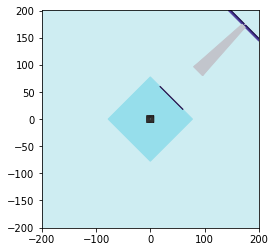

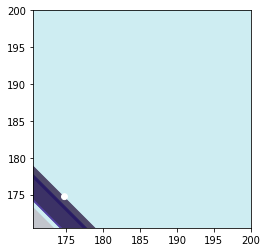

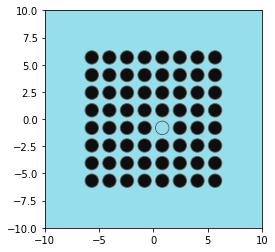

In [8]:
uo2.set_color("#0f0e0e")
he.set_color("#474545")
zr.set_color("#635f5f")
h2o.set_color("#96deeb")
air.set_color("#ceedf2")
lead.set_color("#4e4869")
alu.set_color("#281b63")
copper.set_color("#5240a1")
ss.set_color("#3c3266")
ex4.Plot(xl=[-200.5,200.5],yl=[-200.5,200.5],detectorSize=0.4)
ex4.Plot(xl=[170.5,200],yl=[170.5,200],detectorSize=0.4)
ex4.Plot(xl=[-10,10],yl=[-10,10],detectorSize=0.4)

When we run the experiment, we do not get any warnings, because everything is set.

In [9]:
ex4.Run()

#0 is being calculated
Distance travelled to detector D is being calculated
Contribution to detector D is calculated...
...for gamma energy 0.4971 MeV
...for gamma energy 0.563 MeV
...for gamma energy 0.569 MeV
...for gamma energy 0.6006 MeV
...for gamma energy 0.604 MeV
...for gamma energy 0.6103 MeV
...for gamma energy 0.621 MeV
...for gamma energy 0.635 MeV
...for gamma energy 0.662 MeV
...for gamma energy 0.723 MeV
...for gamma energy 0.724 MeV
...for gamma energy 0.756 MeV
...for gamma energy 0.757 MeV
...for gamma energy 0.765 MeV
...for gamma energy 0.795 MeV
...for gamma energy 0.801 MeV
...for gamma energy 0.873 MeV
...for gamma energy 0.996 MeV
...for gamma energy 1.004 MeV
...for gamma energy 1.038 MeV
...for gamma energy 1.05 MeV
...for gamma energy 1.167 MeV
...for gamma energy 1.205 MeV
...for gamma energy 1.246 MeV
...for gamma energy 1.274 MeV
...for gamma energy 1.365 MeV
...for gamma energy 1.494 MeV
...for gamma energy 1.562 MeV
...for gamma energy 1.596 MeV
...for g

## Plotting the results

Plot the distance travelled in some material and the pinwise contribution.

In [10]:
ex4.dTmap['D']['1'] #to detector D, through matID '1'

array([[0.52      , 0.52      , 0.52      , 0.52      , 0.52      ,
        0.52      , 0.52      , 0.52      ],
       [1.55223954, 1.55456556, 1.55649208, 1.55800944, 1.55910734,
        1.55977478, 1.56      , 0.52      ],
       [2.57315813, 2.58271374, 2.59020885, 2.59561506, 2.5988946 ,
        2.6       , 1.55977478, 0.52      ],
       [3.59219693, 3.61299665, 3.62792997, 3.63696088, 3.64      ,
        2.5988946 , 1.55910734, 0.52      ],
       [4.62293561, 4.65455761, 4.67360363, 4.68      , 0.        ,
        2.59561506, 1.55800944, 0.52      ],
       [5.67408899, 5.70847911, 5.72      , 3.63381661, 3.62792997,
        2.59020885, 1.55649208, 0.52      ],
       [6.7412677 , 6.76      , 4.66931583, 4.65455761, 3.61299665,
        2.58271374, 1.55456556, 0.52      ],
       [7.8       , 5.7031174 , 5.67408899, 4.62293561, 3.59219693,
        2.57315813, 1.55223954, 0.52      ]])

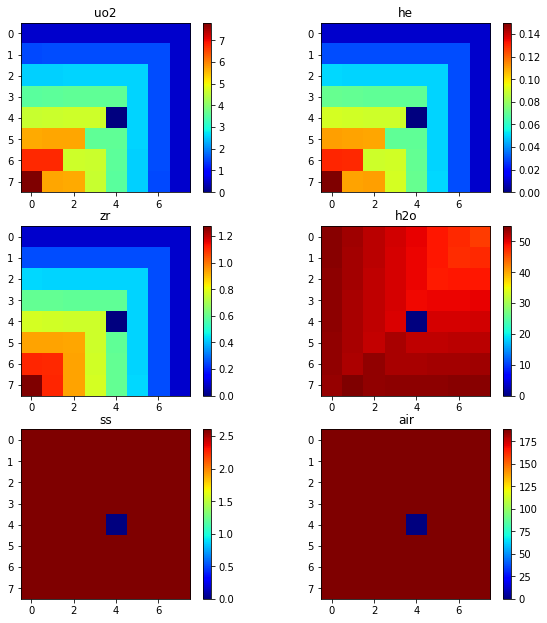

In [11]:
plt.figure()
plt.subplot(321)
plt.imshow(ex4.dTmap['D']['1'],cmap='jet')
plt.title('uo2')
plt.colorbar()

plt.subplot(322)
plt.imshow(ex4.dTmap['D']['2'],cmap='jet')
plt.title('he')
plt.colorbar()

plt.subplot(323)
plt.imshow(ex4.dTmap['D']['3'],cmap='jet')
plt.title('zr')
plt.colorbar()

plt.subplot(324)
plt.imshow(ex4.dTmap['D']['4'],cmap='jet')
plt.title('h2o')
plt.colorbar()

plt.subplot(325)
plt.imshow(ex4.dTmap['D']['5'],cmap='jet')
plt.title('ss')
plt.colorbar()

plt.subplot(326)
plt.imshow(ex4.dTmap['D']['6'],cmap='jet')
plt.title('air')
plt.colorbar()

plt.subplots_adjust(bottom=0.1, right=1.4, top=2.1)

plt.show()

## Geometric efficiency and pinwise contribution

We can see that high energy gamma photons emitted from central pins can contribute to the detector signal, whereas low energy photons cannot escape from central regions.

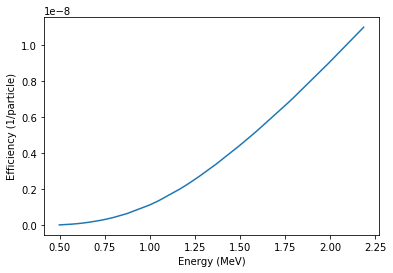

In [12]:
plt.figure()
plt.plot(ex4.elines,ex4.geomEffAve)
plt.xlabel('Energy (MeV)')
plt.ylabel('Efficiency (1/particle)')
plt.show()

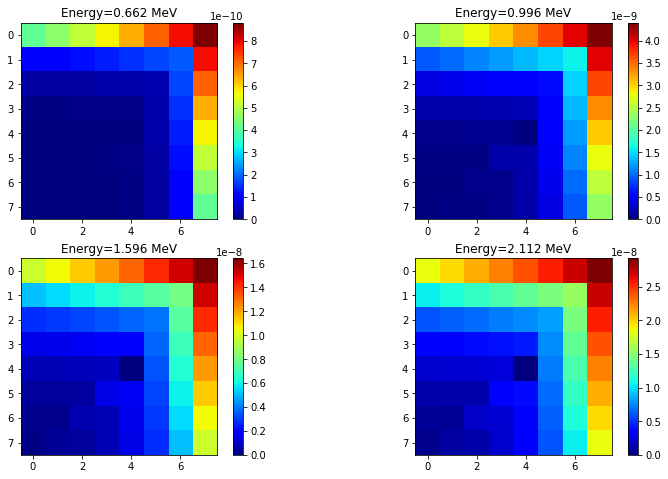

In [13]:
plt.figure()
plt.subplot(221)
plt.imshow(ex4.contributionMapAve['0.662'],cmap='jet')
plt.title('Energy=0.662 MeV')
plt.colorbar()

plt.subplot(222)
plt.imshow(ex4.contributionMapAve['0.996'],cmap='jet')
plt.title('Energy=0.996 MeV')
plt.colorbar()

plt.subplot(223)
plt.imshow(ex4.contributionMapAve['1.596'],cmap='jet')
plt.title('Energy=1.596 MeV')
plt.colorbar()

plt.subplot(224)
plt.imshow(ex4.contributionMapAve['2.112'],cmap='jet')
plt.title('Energy=2.112 MeV')
plt.colorbar()
plt.subplots_adjust(bottom=0.1, right=1.8, top=1.6)

plt.show()

One can easily renormalize this plots in order to get weight percentage of the pin-wise contribution.

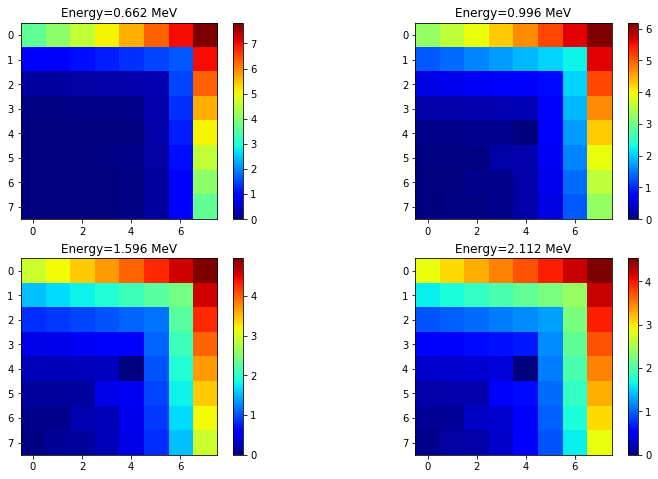

In [14]:
plt.figure()
plt.subplot(221)
plt.imshow(100*ex4.contributionMapAve['0.662']/np.sum(ex4.contributionMapAve['0.662']),cmap='jet')
plt.title('Energy=0.662 MeV')
plt.colorbar()

plt.subplot(222)
plt.imshow(100*ex4.contributionMapAve['0.996']/np.sum(ex4.contributionMapAve['0.996']),cmap='jet')
plt.title('Energy=0.996 MeV')
plt.colorbar()

plt.subplot(223)
plt.imshow(100*ex4.contributionMapAve['1.596']/np.sum(ex4.contributionMapAve['1.596']),cmap='jet')
plt.title('Energy=1.596 MeV')
plt.colorbar()

plt.subplot(224)
plt.imshow(100*ex4.contributionMapAve['2.112']/np.sum(ex4.contributionMapAve['2.112']),cmap='jet')
plt.title('Energy=2.112 MeV')
plt.colorbar()
plt.subplots_adjust(bottom=0.1, right=1.8, top=1.6)

plt.show()

## Random case

And the efficiency compared with the center case. We can see that in this realistic example the center source case tends to underestimate the geometric efficiency.

In [15]:
ex4random=Experiment()
ex4random.set_assembly(bwrOrig)
ex4random.set_detectors(det)
ex4random.set_materials(uo2,he,zr,h2o,air,lead,alu,copper,ss)
ex4random.set_absorbers(steelwindow,lead8mm,steel21mm,alu3mm,copper1mm)
ex4random.set_elines(elines)
ex4random.set_random(10)
ex4random.Run()

#0 is being calculated
Distance travelled to detector D is being calculated
Contribution to detector D is calculated...
...for gamma energy 0.4971 MeV
...for gamma energy 0.563 MeV
...for gamma energy 0.569 MeV
...for gamma energy 0.6006 MeV
...for gamma energy 0.604 MeV
...for gamma energy 0.6103 MeV
...for gamma energy 0.621 MeV
...for gamma energy 0.635 MeV
...for gamma energy 0.662 MeV
...for gamma energy 0.723 MeV
...for gamma energy 0.724 MeV
...for gamma energy 0.756 MeV
...for gamma energy 0.757 MeV
...for gamma energy 0.765 MeV
...for gamma energy 0.795 MeV
...for gamma energy 0.801 MeV
...for gamma energy 0.873 MeV
...for gamma energy 0.996 MeV
...for gamma energy 1.004 MeV
...for gamma energy 1.038 MeV
...for gamma energy 1.05 MeV
...for gamma energy 1.167 MeV
...for gamma energy 1.205 MeV
...for gamma energy 1.246 MeV
...for gamma energy 1.274 MeV
...for gamma energy 1.365 MeV
...for gamma energy 1.494 MeV
...for gamma energy 1.562 MeV
...for gamma energy 1.596 MeV
...for g

Contribution to detector D is calculated...
...for gamma energy 0.4971 MeV
...for gamma energy 0.563 MeV
...for gamma energy 0.569 MeV
...for gamma energy 0.6006 MeV
...for gamma energy 0.604 MeV
...for gamma energy 0.6103 MeV
...for gamma energy 0.621 MeV
...for gamma energy 0.635 MeV
...for gamma energy 0.662 MeV
...for gamma energy 0.723 MeV
...for gamma energy 0.724 MeV
...for gamma energy 0.756 MeV
...for gamma energy 0.757 MeV
...for gamma energy 0.765 MeV
...for gamma energy 0.795 MeV
...for gamma energy 0.801 MeV
...for gamma energy 0.873 MeV
...for gamma energy 0.996 MeV
...for gamma energy 1.004 MeV
...for gamma energy 1.038 MeV
...for gamma energy 1.05 MeV
...for gamma energy 1.167 MeV
...for gamma energy 1.205 MeV
...for gamma energy 1.246 MeV
...for gamma energy 1.274 MeV
...for gamma energy 1.365 MeV
...for gamma energy 1.494 MeV
...for gamma energy 1.562 MeV
...for gamma energy 1.596 MeV
...for gamma energy 1.766 MeV
...for gamma energy 1.797 MeV
...for gamma energy 1.98

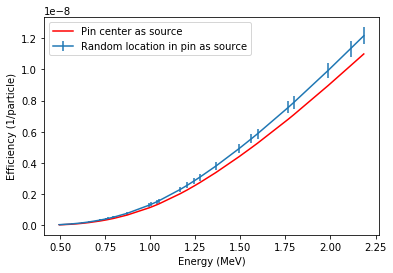

In [16]:
plt.figure()
plt.errorbar(ex4random.elines,ex4random.geomEffAve,3*ex4random.geomEffAveErr,label='Random location in pin as source')
plt.plot(ex4.elines,ex4.geomEffAve,'r',label='Pin center as source')
plt.legend()
plt.xlabel('Energy (MeV)')
plt.ylabel('Efficiency (1/particle)')
plt.show()